In [5]:
% matplotlib inline
from pymongo import MongoClient
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import networkx as nx

In [6]:
mongo_username = 'Campione'
mongo_password = 'veTRxJL29lpKWwPn'
mongo_url = 'mongodb://%s:%s@cluster0-shard-00-01-i6gcp.mongodb.net:27017/admin' % (
            mongo_username, mongo_password)
client = MongoClient(mongo_url,ssl=True,replicaSet='Cluster0-shard-0',authSource='admin')
info = client.server_info()  # Forces a call.
print(info)
print(client.database_names())

{'version': '3.4.14', 'gitVersion': 'fd954412dfc10e4d1e3e2dd4fac040f8b476b268', 'modules': ['enterprise'], 'allocator': 'tcmalloc', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [3, 4, 14, 0], 'openssl': {'running': 'OpenSSL 1.0.1e-fips 11 Feb 2013', 'compiled': 'OpenSSL 1.0.1e-fips 11 Feb 2013'}, 'buildEnvironment': {'distmod': 'rhel70', 'distarch': 'x86_64', 'cc': '/opt/mongodbtoolchain/v2/bin/gcc: gcc (GCC) 5.4.0', 'ccflags': '-fno-omit-frame-pointer -fno-strict-aliasing -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -fno-builtin-memcmp', 'cxx': '/opt/mongodbtoolchain/v2/bin/g++: g++ (GCC) 5.4.0', 'cxxflags': '-Woverloaded-virtual -Wno-maybe-uninitialized -std=c++11', 'linkflags': '-pthread -Wl,-z,now -rdynamic -Wl,--fatal-warnings -fstack-protector-strong -fuse-ld=gold -Wl,-

In [7]:
db = client.gitdbPro

In [8]:
repos = db.repos

In [9]:
descriptions = repos.distinct('description')

In [10]:
df = pd.DataFrame(descriptions)

In [11]:
df.head()

,0
0,How to be low-level programmer
1,Import OpenStreetMap data into Unreal Engine 4
2,react-native template to target multiple platf...
3,Connect your App to Multiple Messaging Channel...
4,Proto Actor - Ultra fast distributed actors fo...


In [12]:
len_df = {}
index = 0
for item in df[0]:
    temp_str = str(item)
    temp_list = temp_str.strip().split(" ")
    len_df[index]=len(temp_list)
    index += 1
print (len_df)

{0: 5, 1: 7, 2: 12, 3: 12, 4: 12, 5: 1, 6: 1, 7: 8, 8: 11, 9: 10, 10: 4, 11: 10, 12: 8, 13: 5, 14: 10, 15: 4, 16: 16, 17: 25, 18: 6, 19: 11, 20: 6, 21: 11, 22: 3, 23: 1, 24: 8, 25: 42, 26: 14, 27: 6, 28: 8, 29: 3, 30: 8, 31: 10, 32: 12, 33: 21, 34: 1, 35: 21, 36: 5, 37: 6, 38: 8, 39: 9, 40: 7, 41: 6, 42: 4, 43: 6, 44: 24, 45: 7, 46: 9, 47: 8, 48: 11, 49: 6, 50: 33, 51: 1, 52: 6, 53: 8, 54: 5, 55: 6, 56: 5, 57: 7, 58: 1, 59: 5, 60: 8, 61: 12, 62: 2, 63: 8, 64: 5, 65: 8, 66: 11, 67: 12, 68: 10, 69: 4, 70: 4, 71: 11, 72: 4, 73: 22, 74: 6, 75: 10, 76: 39, 77: 10, 78: 13, 79: 11, 80: 8, 81: 9, 82: 7, 83: 1, 84: 8, 85: 10, 86: 4, 87: 3, 88: 18, 89: 20, 90: 14, 91: 10, 92: 8, 93: 21, 94: 6, 95: 2, 96: 16, 97: 13, 98: 11, 99: 10, 100: 12, 101: 14, 102: 13, 103: 8, 104: 16, 105: 9, 106: 13, 107: 2, 108: 8, 109: 3, 110: 11, 111: 6, 112: 10, 113: 4, 114: 5, 115: 9, 116: 11, 117: 2, 118: 9, 119: 5, 120: 20, 121: 12, 122: 7, 123: 6, 124: 12, 125: 3, 126: 8, 127: 12, 128: 4, 129: 9, 130: 3, 131: 7, 

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
temp_list=[]
for item in len_df.keys():
    temp_list.append(len_df[item])
temp_list_c = Counter(temp_list)
print (temp_list_c)

Counter({7: 1068, 6: 1065, 8: 1037, 1: 1005, 9: 923, 5: 918, 4: 807, 10: 745, 3: 619, 11: 605, 12: 518, 2: 420, 13: 408, 14: 330, 15: 268, 16: 193, 17: 148, 18: 112, 19: 99, 20: 77, 21: 73, 22: 62, 24: 40, 23: 37, 27: 26, 26: 26, 25: 23, 30: 23, 28: 21, 29: 20, 33: 16, 32: 14, 31: 14, 35: 10, 36: 8, 34: 6, 42: 5, 37: 5, 46: 5, 43: 4, 38: 4, 41: 4, 39: 3, 54: 3, 45: 3, 40: 3, 48: 3, 59: 2, 44: 2, 52: 2, 47: 2, 56: 2, 63: 2, 79: 1, 55: 1, 51: 1, 1306: 1, 69: 1, 61: 1, 72: 1, 57: 1, 78: 1, 67: 1, 70: 1, 49: 1, 64: 1})


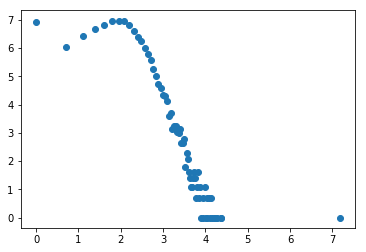

In [15]:
x1=[]
y1=[]
for item in temp_list_c.keys():
    x1.append(np.log(int(item)))
    y1.append(np.log(int(temp_list_c[item])))
x=np.asarray(x1)
y=np.asarray(y1)
plt.scatter(x,y)

#plt.show()


In [16]:
#ax.set_xscale('log')
#ax.set_yscale('log')
#Y, X = np.histogram(len_df.values(),  normed=True)

#X = [x*np.sqrt(bins[1]) for x in X][:-1]  # find the center point for each bin. can you explain this?

#plt.ylim((0.00001, 1))
#plt.xlabel('Number of deaths, x')
#plt.ylabel("n(X)")
#plt.loglog(X,Y, 'o', markersize=3, markerfacecolor='none')

In [17]:
import nltk

token_list = []
for item in df[0]:
    temp_str = str(item)
    df_tokens = nltk.word_tokenize(temp_str)
    for i in df_tokens:
        token_list.append(i)
token_list

['How',
 'to',
 'be',
 'low-level',
 'programmer',
 'Import',
 'OpenStreetMap',
 'data',
 'into',
 'Unreal',
 'Engine',
 '4',
 'react-native',
 'template',
 'to',
 'target',
 'multiple',
 'platforms',
 ':',
 'globe_with_meridians',
 ':',
 ':',
 'iphone',
 ':',
 ':',
 'computer',
 ':',
 'with',
 'single',
 'codebase',
 '.',
 'Connect',
 'your',
 'App',
 'to',
 'Multiple',
 'Messaging',
 'Channels',
 'with',
 'the',
 'W3C',
 'Open',
 'standard',
 '.',
 'Proto',
 'Actor',
 '-',
 'Ultra',
 'fast',
 'distributed',
 'actors',
 'for',
 'Go',
 ',',
 'C',
 '#',
 'and',
 'Java/Kotlin',
 '用rxjava简单封装了指纹识别，并实现对生命周期的自动绑定，顺便撸了一个指纹控件',
 'pagehelper-spring-boot',
 '📅',
 'A',
 'date',
 'picker',
 'components',
 'for',
 'ionic2',
 '／ionic3',
 'Track',
 'prices',
 'on',
 'Amazon',
 'and',
 'receive',
 'email',
 'alerts',
 'for',
 'price',
 'drops',
 'Advanced',
 'web',
 'based',
 'trading',
 'client',
 'for',
 'the',
 'Stellar',
 'network',
 '.',
 '📈📊💹💱',
 'Join',
 'our',
 'slack',
 'channel',
 'An',
 'E

In [18]:
token_list_c = Counter(token_list)
token_list_c

Counter({'How': 29,
         'to': 1835,
         'be': 112,
         'low-level': 5,
         'programmer': 2,
         'Import': 2,
         'OpenStreetMap': 1,
         'data': 229,
         'into': 117,
         'Unreal': 4,
         'Engine': 22,
         '4': 41,
         'react-native': 22,
         'template': 69,
         'target': 11,
         'multiple': 52,
         'platforms': 18,
         ':': 1664,
         'globe_with_meridians': 1,
         'iphone': 6,
         'computer': 20,
         'with': 1156,
         'single': 42,
         'codebase': 6,
         '.': 3641,
         'Connect': 10,
         'your': 546,
         'App': 92,
         'Multiple': 7,
         'Messaging': 5,
         'Channels': 1,
         'the': 1501,
         'W3C': 2,
         'Open': 84,
         'standard': 30,
         'Proto': 1,
         'Actor': 4,
         '-': 362,
         'Ultra': 2,
         'fast': 111,
         'distributed': 41,
         'actors': 1,
         'for': 3604,
       

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Wenxuan
[nltk_data]     Han\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
print (sorted(token_list_c.items(), key=lambda d: d[1],reverse=True))

[(',', 6874), ('.', 3641), ('for', 3604), ('and', 2655), ('A', 2002), ('to', 1835), ('of', 1698), (':', 1664), ('the', 1501), ('a', 1453), ('in', 1352), ('with', 1156), (')', 1019), ('(', 1004), ('on', 882), ('is', 724), ('library', 553), ('your', 546), ('that', 539), ('Android', 457), ('using', 420), ('by', 412), ('React', 398), ('iOS', 378), ('from', 369), ('-', 362), ('An', 341), ('code', 341), ('The', 339), ('simple', 334), ('based', 324), ('+', 320), ('&', 316), ('!', 301), ('tool', 298), ('an', 292), ('you', 284), ("'s", 283), ('implementation', 278), ('framework', 275), ('app', 266), ('Python', 254), ('API', 249), ("''", 235), ('data', 229), ('Go', 219), ('Swift', 219), ('web', 213), ('Learning', 208), ('list', 208), ('``', 208), ('This', 194), ('as', 192), ('learning', 191), ('or', 187), ('use', 184), ('project', 182), ('https', 181), ('written', 162), ('can', 157), ('/', 155), ('Deep', 152), ('source', 151), ('application', 148), ('JavaScript', 144), ('component', 141), ('Nati

In [21]:
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory
DetectorFactory.seed = 1

In [22]:
detect('Hello')

'fi'

In [23]:
detect('你好')

'zh-cn'

In [24]:
detect('good morning')

'en'

In [25]:
lang_df = []
index = 0
for item in df[0]:
    try:
        d = detect(str(item))
        lang_df.append(d)
    except:
        index +=1
        
lang_df_c = Counter(lang_df)
lang_df_c

Counter({'af': 59,
         'ca': 125,
         'cs': 6,
         'cy': 30,
         'da': 86,
         'de': 111,
         'en': 9413,
         'es': 39,
         'et': 55,
         'fi': 21,
         'fr': 137,
         'hr': 7,
         'hu': 3,
         'id': 16,
         'it': 114,
         'ja': 7,
         'ko': 166,
         'lt': 10,
         'lv': 1,
         'nl': 60,
         'no': 208,
         'pl': 32,
         'pt': 50,
         'ro': 84,
         'ru': 15,
         'sk': 5,
         'sl': 20,
         'so': 16,
         'sq': 5,
         'sv': 24,
         'sw': 13,
         'th': 2,
         'tl': 31,
         'tr': 14,
         'vi': 156,
         'zh-cn': 697,
         'zh-tw': 2})

In [26]:
df[0:432]

,0
0,How to be low-level programmer
1,Import OpenStreetMap data into Unreal Engine 4
2,react-native template to target multiple platf...
3,Connect your App to Multiple Messaging Channel...
4,Proto Actor - Ultra fast distributed actors fo...
5,用rxjava简单封装了指纹识别，并实现对生命周期的自动绑定，顺便撸了一个指纹控件
6,pagehelper-spring-boot
7,📅 A date picker components for ionic2 ／ionic3
8,Track prices on Amazon and receive email alert...
9,Advanced web based trading client for the Stel...


In [27]:
detect_langs('good night')

[cy:0.8571385349874036, so:0.14285648692421649]

In [28]:
from nltk.tokenize import RegexpTokenizer  
from stop_words import get_stop_words  
from nltk.stem.porter import PorterStemmer  
from gensim import corpora, models  
import gensim  

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')
  
# Create p_stemmer of class PorterStemmer  
p_stemmer = PorterStemmer()  
      
# create sample documents  
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."  
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."  
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."  
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."  
doc_e = "Health professionals say that brocolli is good for your health."   
  
# compile sample documents into a list  
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]
  
# list for tokenized documents in loop  
texts = []  
  
# loop through document list  
for i in doc_set:  
      
    # clean and tokenize document string  
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)  
  
    # remove stop words from tokens  
    stopped_tokens = [i for i in tokens if not i in en_stop]  
      
    # stem tokens  
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]  
      
    # add tokens to list
    texts.append(stemmed_tokens)
  
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
      
# convert tokenized documents into a document-term matrix  
corpus = [dictionary.doc2bow(text) for text in texts]
  
# generate LDA model  
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
for topic in ldamodel.print_topics(num_words=3, num_topics=4):
    print(topic[1])

0.074*"drive" + 0.074*"brother" + 0.074*"mother"
0.135*"health" + 0.052*"pressur" + 0.052*"suggest"
0.078*"brocolli" + 0.078*"good" + 0.078*"brother"
0.031*"brocolli" + 0.031*"good" + 0.031*"drive"


C:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [29]:
des_list = []
for item in df[0]:
    des_list.append(item)
    
print (des_list[:5])

['How to be low-level programmer', 'Import OpenStreetMap data into Unreal Engine 4', 'react-native template to target multiple platforms :globe_with_meridians: :iphone: :computer: with single codebase.', 'Connect your App to Multiple Messaging Channels with the W3C Open standard.', 'Proto Actor - Ultra fast distributed actors for Go, C# and Java/Kotlin']


In [30]:
text_list=[]
cn_text_list=[]
for text_item in des_list:
    try:
        if detect(str(text_item))=='zh-cn':
            cn_text_list.append(str(text_item))
        else:
            text_list.append(str(text_item))
    except:
        error_str='error'

In [31]:
print(text_list[:5])
print(cn_text_list[:5])

['How to be low-level programmer', 'Import OpenStreetMap data into Unreal Engine 4', 'react-native template to target multiple platforms :globe_with_meridians: :iphone: :computer: with single codebase.', 'Connect your App to Multiple Messaging Channels with the W3C Open standard.', 'Proto Actor - Ultra fast distributed actors for Go, C# and Java/Kotlin']
['用rxjava简单封装了指纹识别，并实现对生命周期的自动绑定，顺便撸了一个指纹控件', '每周一篇，内容精简，不咸不淡，期盼探讨。微信公众号：芋道源码【纯源码分享公众号】', '一款高效、高性能的帧动画生成工具', 'iOS即时通讯，从入门到“放弃”？', '『假装看天气』─── 天气预报 & 公交查询 & 资讯阅读 & 妹纸福利 的 Android 客户端']


In [32]:
# list for tokenized documents in loop  
texts = []

# loop through document list (all languages except Chinese)
for i in text_list:
    if i is not None:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        
        # remove stop words from tokens  
        stopped_tokens = [i for i in tokens if not i in en_stop]
        
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        
        # add tokens to list
        texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
      
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=120, id2word = dictionary, passes=20)

C:\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [33]:
for topic in ldamodel.print_topics(num_topics=120, num_words=10):
    print(topic[1])

0.161*"get" + 0.155*"util" + 0.066*"connect" + 0.064*"onlin" + 0.041*"cpu" + 0.039*"picker" + 0.037*"use" + 0.034*"collabor" + 0.030*"arm" + 0.029*"filesystem"
0.273*"develop" + 0.157*"test" + 0.061*"repo" + 0.061*"offici" + 0.052*"editor" + 0.045*"smart" + 0.038*"syntax" + 0.030*"contract" + 0.030*"wordpress" + 0.027*"use"
0.154*"load" + 0.144*"type" + 0.074*"button" + 0.072*"safe" + 0.064*"pull" + 0.035*"latex" + 0.033*"snippet" + 0.027*"use" + 0.024*"refresh" + 0.023*"symfoni"
0.311*"http" + 0.157*"github" + 0.155*"com" + 0.040*"www" + 0.025*"xcode" + 0.023*"tri" + 0.019*"issu" + 0.018*"patch" + 0.017*"synthesi" + 0.013*"exist"
0.200*"featur" + 0.130*"effect" + 0.127*"5" + 0.057*"6" + 0.053*"remot" + 0.031*"keyboard" + 0.022*"case" + 0.020*"rat" + 0.019*"administr" + 0.015*"short"
0.266*"power" + 0.104*"databas" + 0.092*"download" + 0.031*"simpl" + 0.031*"chain" + 0.029*"recyclerview" + 0.026*"signal" + 0.021*"base" + 0.020*"argument" + 0.019*"evolut"
0.252*"make" + 0.098*"method" +

In [35]:
# print(texts)
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(ldamodel.show_topic(t, 10)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

AttributeError: 'list' object has no attribute 'items'